## Import Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
image_directory='/content/gdrive/MyDrive/brain_tumor_dataset/'

## Load Data

In [ ]:
image_directory='/content/gdrive/MyDrive/brain_tumor_dataset/'
no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')

print('No Tumor: ', len(no_tumor_images))
print('Tumor: ',len(yes_tumor_images))

No Tumor:  98
Tumor:  155


In [ ]:
dataset=[]
label=[]

INPUT_SIZE=64

## Create labels 

In [ ]:
for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [ ]:
for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [ ]:
dataset=np.array(dataset)
label=np.array(label)

print('Dataset: ',len(dataset))
print('Label: ',len(label))

Dataset:  171
Label:  171


## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=42)

## Normalize the Data

In [ ]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

## Model Building

In [ ]:
model=Sequential()

model.add(Conv2D(32, (3,3),activation='relu', input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3),activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

## Model Fit

In [ ]:
r=model.fit(X_train, y_train, 
batch_size=32, 
verbose=1, epochs=100, 
validation_data=(X_test, y_test),
shuffle=False)

Epoch 1/100
5/5 [==============================] - 12s 138ms/step - loss: 0.6995 - accuracy: 0.4853 - val_loss: 0.6725 - val_accuracy: 0.6286
Epoch 2/100
5/5 [==============================] - 0s 18ms/step - loss: 0.6634 - accuracy: 0.6985 - val_loss: 0.6565 - val_accuracy: 0.6571
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6402 - accuracy: 0.6618 - val_loss: 0.6224 - val_accuracy: 0.6286
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 0.5832 - accuracy: 0.7500 - val_loss: 0.5772 - val_accuracy: 0.6571
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.5474 - accuracy: 0.7206 - val_loss: 0.5685 - val_accuracy: 0.6000
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 0.5086 - accuracy: 0.7721 - val_loss: 0.5644 - val_accuracy: 0.6286
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 0.4731 - accuracy: 0.7868 - val_loss: 0.5822 - val_accuracy: 0.6571
Epoch 8/100
5/5 [=

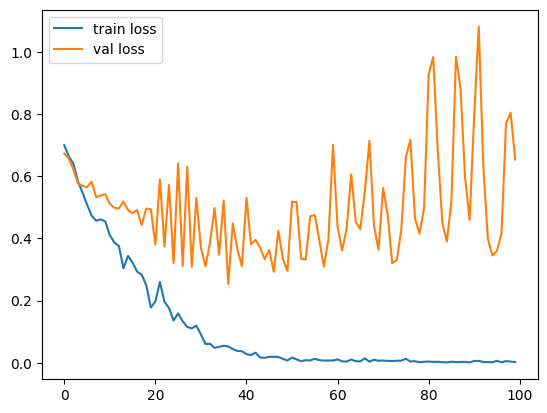

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

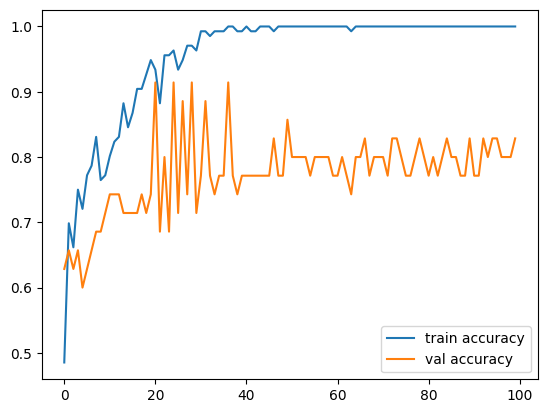

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
#from sklearn.metrics import plot_confusion_matrix

In [ ]:
labels = ['yes,','no']

In [ ]:
#confusion matrix
y_pred=model.predict(X_test)
y_true=y_test

2/2 [==============================] - 0s 6ms/step


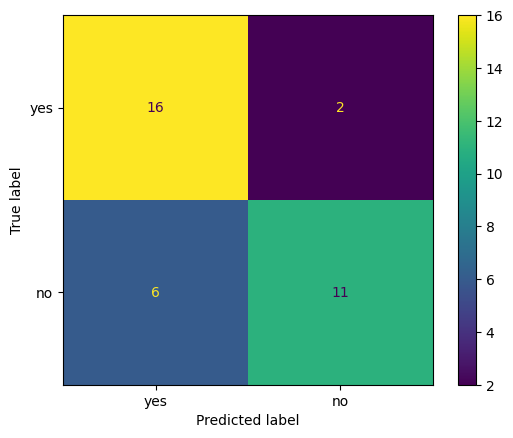

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(y_test,1)
predicted = numpy.random.binomial(1,y_pred)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['yes', 'no'])

cm_display.plot()
plt.show()

## Save the Model

In [ ]:
model.save('/content/gdrive/MyDrive/brain_tumor_dataset/BrainTumorDetection.h5')

## Load Model 

In [ ]:
model = load_model('/content/gdrive/MyDrive/brain_tumor_dataset/BrainTumorDetection.h5')

## Make Prediction on New Data

In [ ]:
def make_prediction(img):
    
    input_img = np.expand_dims(img, axis=0)
    
    res = (model.predict(input_img) > 0.5).astype("int32")
    return res

In [ ]:
def show_result(img):
    img_path = f"{image_directory}pred/{img}"
    image = cv2.imread(img_path)

    img = Image.fromarray(image)

    img = img.resize((64,64))

    img = np.array(img)
    
    plt.imshow(img)
    plt.show()
    
    pred = make_prediction(img)
    if pred:
        print("yes Tumor Detected")
    else:
        print("No  Tumor Detected")

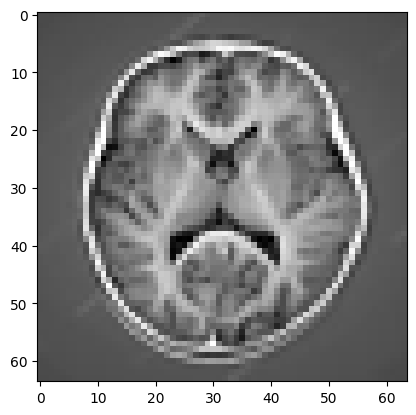

1/1 [==============================] - 0s 30ms/step
No  Tumor Detected


In [ ]:
show_result('rks.jpeg')

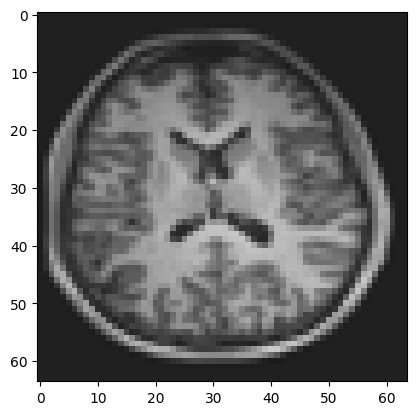

1/1 [==============================] - 0s 95ms/step
No  Tumor Detected


In [ ]:
show_result('pred57.jpg')